# 1. Loading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data0 = pd.read_csv("5.urldata.csv")

In [4]:
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [5]:
data0.shape

(10000, 18)

# 2. EDA (Exploratory Data Analysis)

In [7]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [8]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

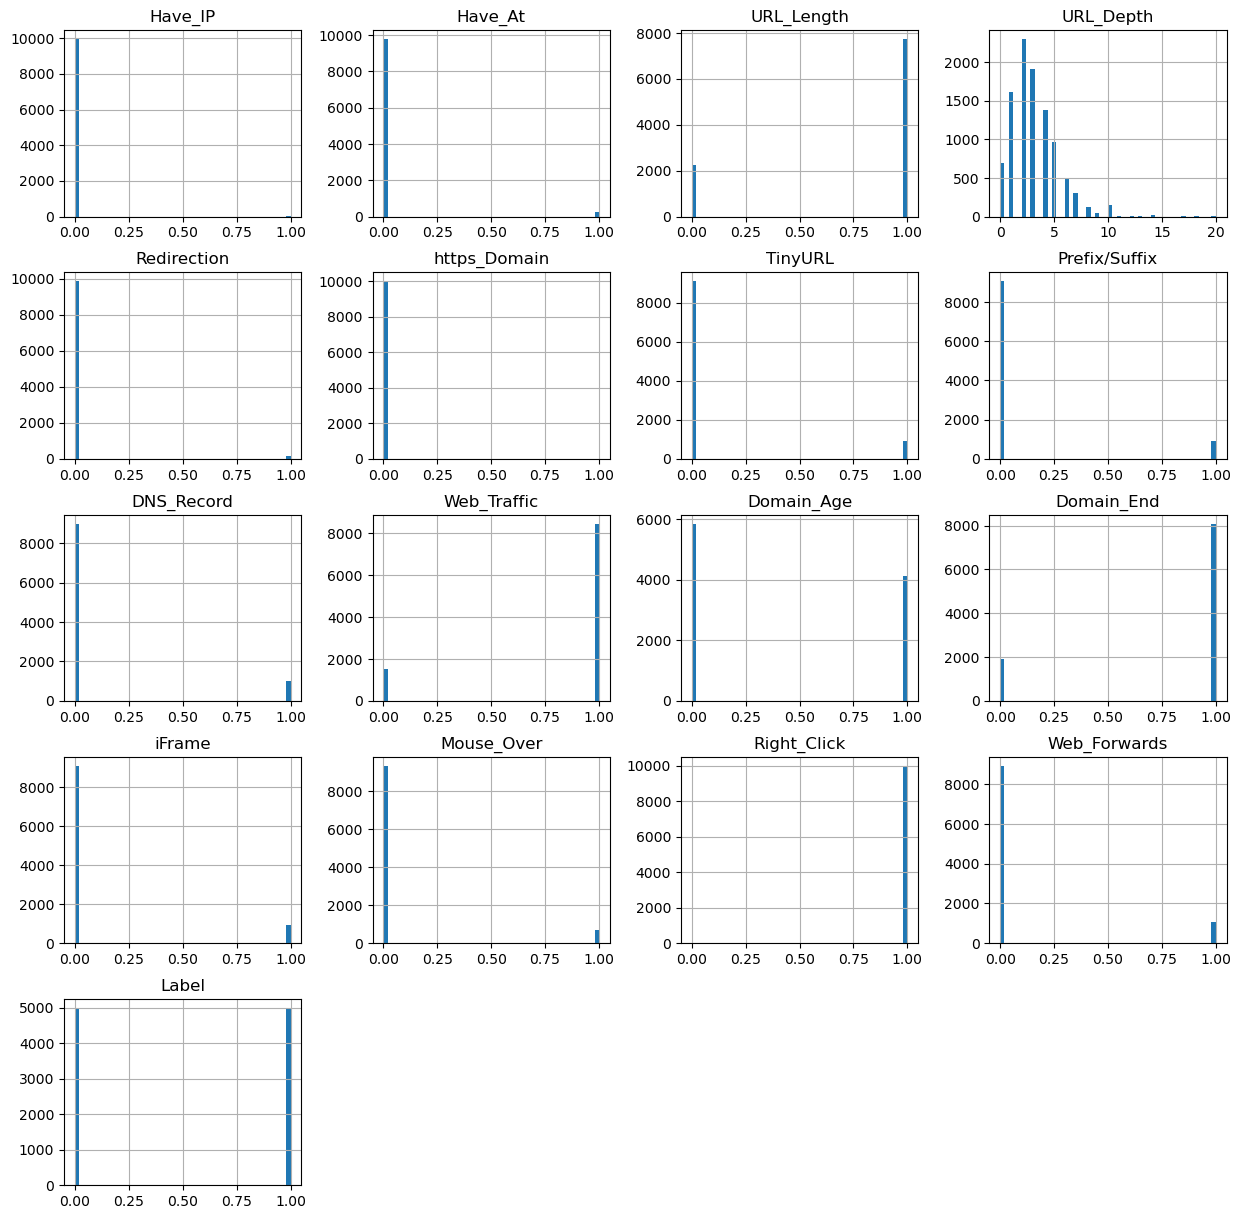

In [9]:
data0.hist(bins = 50, figsize = (15,15))
plt.show()

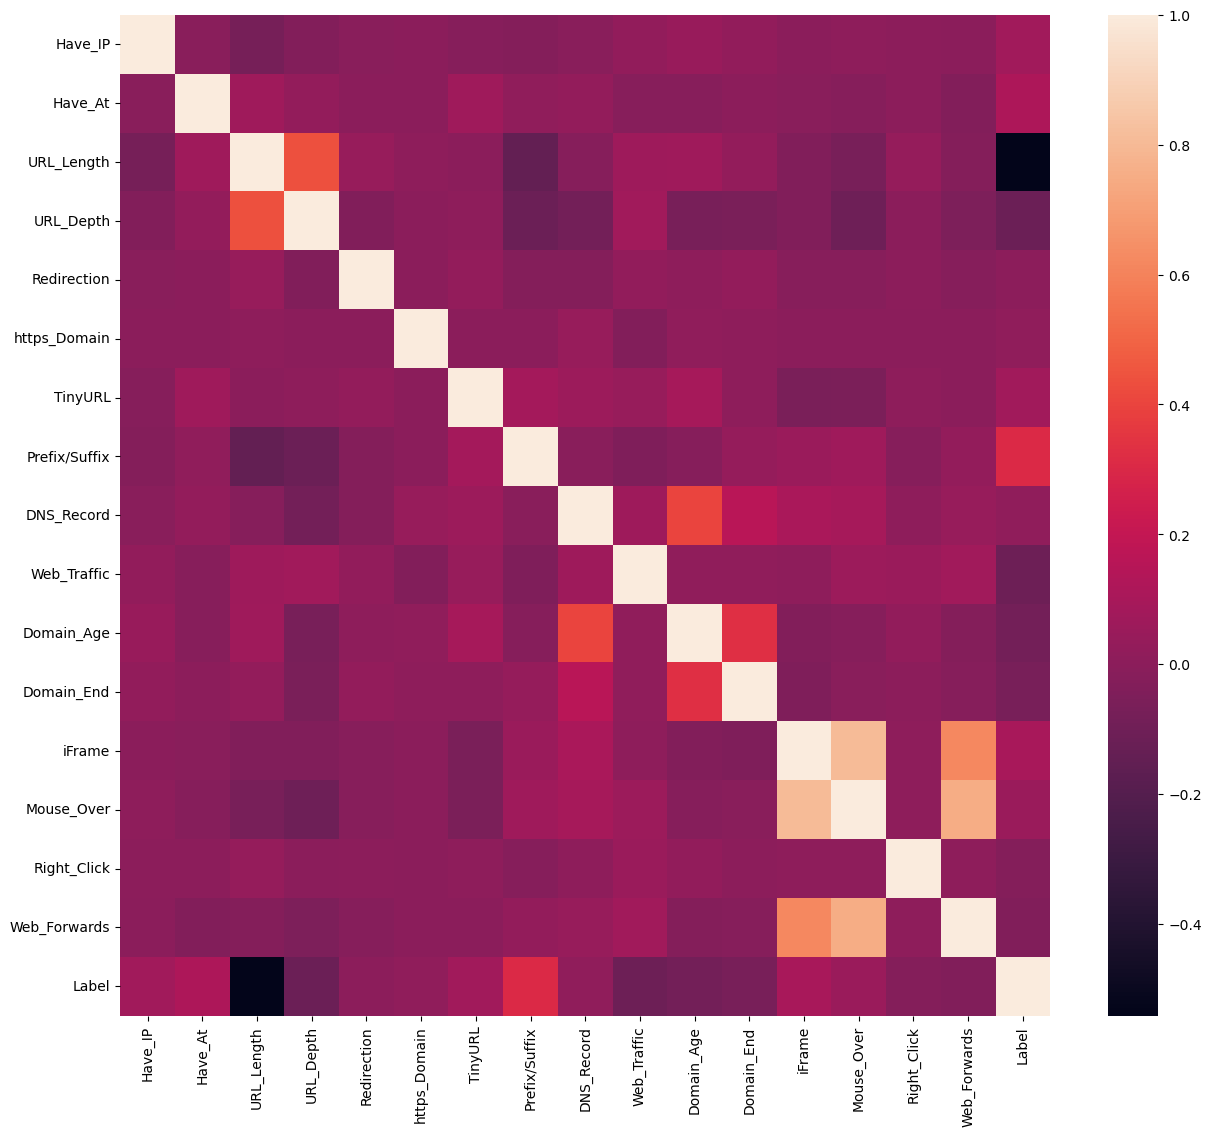

In [10]:
# Correlation heatmap

plt.figure(figsize =(15,13))
sns.heatmap(data0.iloc[:,1:].corr())
plt.show()

In [11]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [12]:
# dropping Domain column:
data = data0.drop(['Domain'], axis = 1).copy()
data = data.rename(columns={'Prefix/Suffix':'Prefix_Suffix'})

In [13]:
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [14]:
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix_Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [15]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed

data = data.sample(frac=1).reset_index(drop = True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
3,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
4,0,0,1,4,0,0,0,1,0,1,0,1,0,0,1,0,1


# 3. Splitting the Data

In [17]:
y = data['Label']
X = data.drop('Label',axis=1)

In [18]:
X.shape, y.shape

((10000, 16), (10000,))

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 12)

In [20]:
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# 4. Models & Training

- Decision Tree
- Random Forest
- Multilayer Perceptrons
- XGBoost
- Autoencoder Neural Network
- Support Vector Machines

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

In [24]:
#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## 4.1 Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5)

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [28]:
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

In [29]:
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.814
Decision Tree: Accuracy on test Data: 0.812


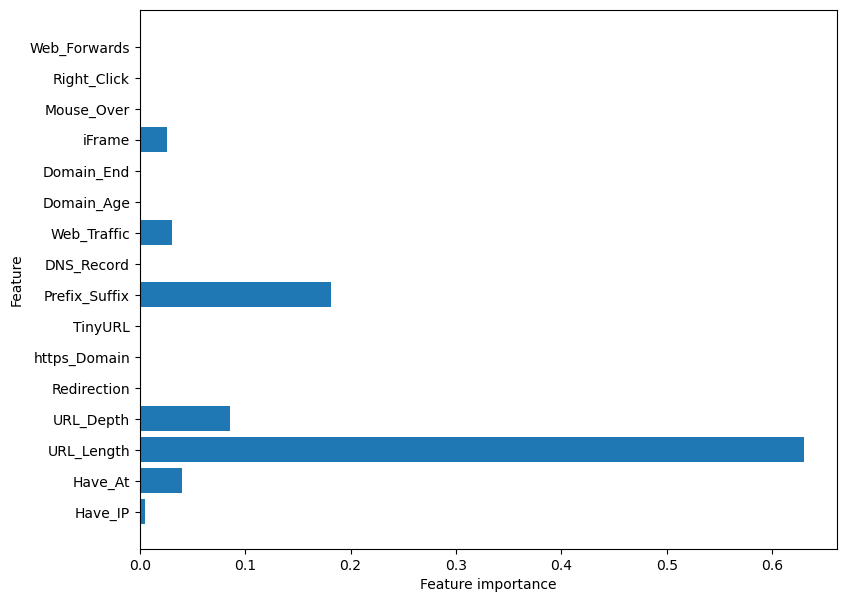

In [30]:
# Checking Feature importance
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [31]:
# storing the result
storeResults('Decision Tree',acc_train_tree,acc_test_tree)

# 4.2 Random Forest Classifier


In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 5)

forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [34]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [35]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.812
Random forest: Accuracy on test Data: 0.809


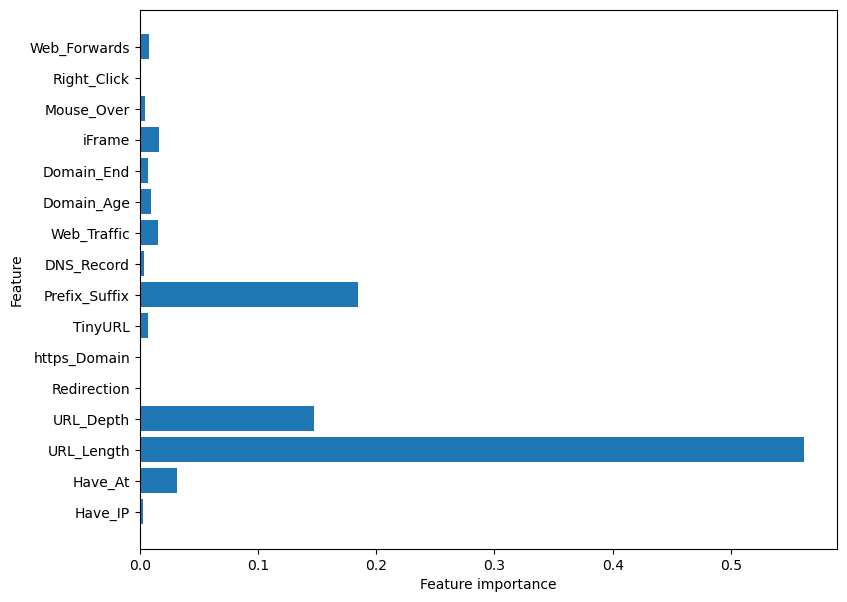

In [36]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [37]:
# storing the result
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## 4.3 Multilayer Perceptrons (MLPs): Deep Learning

In [39]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [40]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [41]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.858
Multilayer Perceptrons: Accuracy on test Data: 0.863


## 4.4 XGBoost Classifier

In [43]:
!pip install xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.4, max_depth = 7)

xgb.fit(X_train,y_train)

Defaulting to user installation because normal site-packages is not writeable


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [44]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [45]:
X_train.tail()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
3714,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0
7409,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,1
3325,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0
9606,0,0,0,3,0,0,0,0,1,0,1,1,0,0,1,0
5787,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
y_train.tail()

3714    0
7409    0
3325    0
9606    1
5787    0
Name: Label, dtype: int64

In [47]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.865
XGBoost : Accuracy on test Data: 0.868


In [68]:
features = [0,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0]
FEATURE_NAMES = [
    'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
    'https_Domain', 'TinyURL', 'Prefix_Suffix', 'DNS_Record', 'Web_Traffic',
    'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards'
]
df = pd.DataFrame([features], columns = FEATURE_NAMES)
prediction = xgb.predict(df)[0]
print(prediction)

1


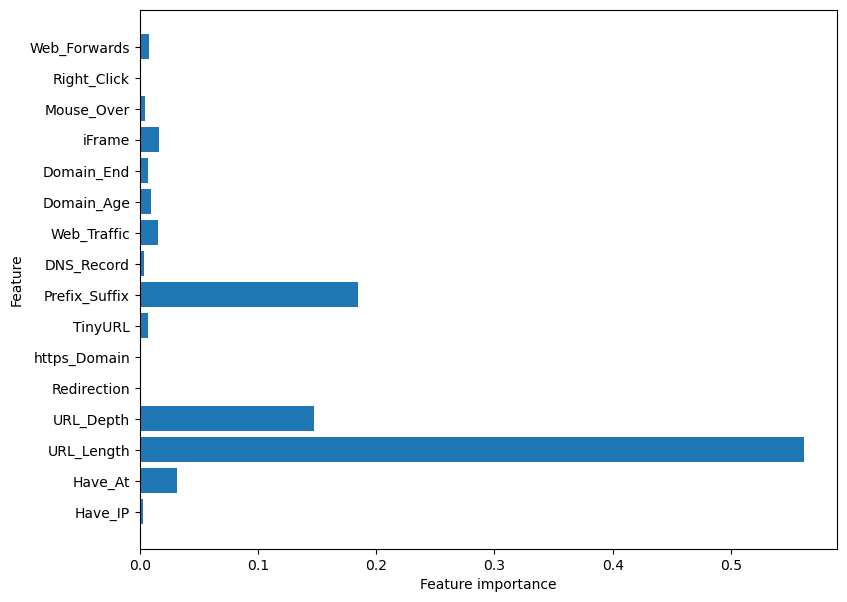

In [70]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [71]:

#storing the results
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## 4.5 Autoencoder Neural Network

In [ ]:
!pip install keras
!pip install tensorflow 

import keras
from keras.layers import Input,Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#Building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 
     

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

In [ ]:
#storing the results
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

## 4.6 Support Vector Machines



In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = "linear", C= 1.0,random_state = 12)

svm.fit(X_train,y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

In [ ]:
#storing the results
storeResults('SVM', acc_train_svm, acc_test_svm)

# 5. Comparing the models

In [ ]:
results = pd.DataFrame({'ML Model': ML_Model, 'Train Accuracy':acc_train, 'Test Accuracy':acc_test})


In [ ]:
results

In [ ]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending = False)

For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

In [74]:
# saving XGBOOST model to pickle
import pickle
pickle.dump(xgb,open("XGBoostClassifier.pkl", "wb"))

#### testing the saved model

In [ ]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pkl", "rb"))
loaded_model

In [ ]:
print(prediction)

In [ ]:
data0['Label'].value_counts()